In [2]:
!pip install qiskit qiskit-ionq qiskit_aer numpy matplotlib

  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_ionq-0.5.13-py3-none-any.whl.metadata (8.1 kB)
  Using cached qiskit_aer-0.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached qiskit-1.4.3-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached symengine-0.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached qiskit_ionq-0.5.13-py3-none-any.whl (47 kB)
Using cached qiskit-1.4.3-cp39-abi3-manylinux_2_17_x86_64.manylinux

In [1]:
#external libraries and dependencies

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ionq import IonQProvider  
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

#internal dependencies

from DeferredCircuit import ionq_circuit_X, ionq_circuit_Y, ionq_circuit_Z
from BaseCircuit import midcircuit_X, midcircuit_Y, midcircuit_Z
from AriaNoiseModel import build_noise_aria1
from Simulation import BaseXCounts, BaseYCounts, BaseZCounts
from Fidelity import fidelity
from Depth import depth
from GateCount import gate_count
from Efficiency import reuse_efficiency
from MemoryLoad import memory_load


In [5]:
#set up the ionq provider and backend
provider = IonQProvider(
    token="", #from the ionq site 
    url="https://api.ionq.co/v0.3")

backend = provider.get_backend("simulator", gateset="native") 
backend.set_options(noise_model="aria-1")   


#set up the Aer simulator
sim = AerSimulator(noise_model=build_noise_aria1())

# the number of rounds 
n_max = 5


In [5]:
ionq_counts_X, qiskit_counts_X= BaseXCounts(backend, sim, n_max, ionq_circuit_X, midcircuit_X)
ionq_counts_Y, qiskit_counts_Y= BaseYCounts(backend, sim, n_max, ionq_circuit_Y, midcircuit_Y)
ionq_counts_Z, qiskit_counts_Z= BaseZCounts(backend, sim, n_max, ionq_circuit_Z, midcircuit_Z)

In [6]:
fidelities = fidelity(qiskit_counts_Z, qiskit_counts_X, qiskit_counts_Y, 
                      ionq_counts_Z, ionq_counts_X, ionq_counts_Y, n_max)


In [7]:
for n, fid in fidelities.items():
    print(f"Round {n}: Weighted Fidelity = {fid:.6f}")


Round 1: Weighted Fidelity = 0.997901
Round 2: Weighted Fidelity = 0.989570
Round 3: Weighted Fidelity = 0.974374
Round 4: Weighted Fidelity = 0.954177
Round 5: Weighted Fidelity = 0.942373


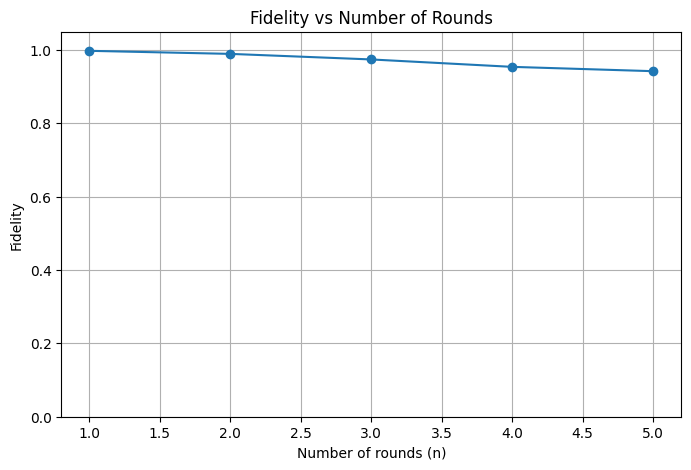

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max+1), fidelities.values(), 'o-') 
plt.xlabel('Number of rounds (n)')
plt.ylabel('Fidelity')
plt.title('Fidelity vs Number of Rounds')
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.show()

In [9]:
depths1, depths2 = depth(ionq_circuit_Z, midcircuit_Z, n_max)

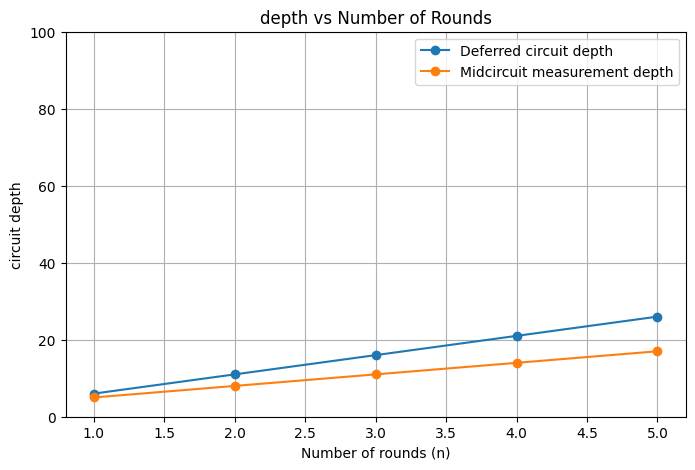

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), depths1, 'o-', label='Deferred circuit depth')
plt.plot(range(1, n_max + 1), depths2, 'o-', label='Midcircuit measurement depth')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit depth')
plt.title('depth vs Number of Rounds')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

In [11]:
gate_counts1, gate_counts2 = gate_count(ionq_circuit_Z, midcircuit_Z, n_max)

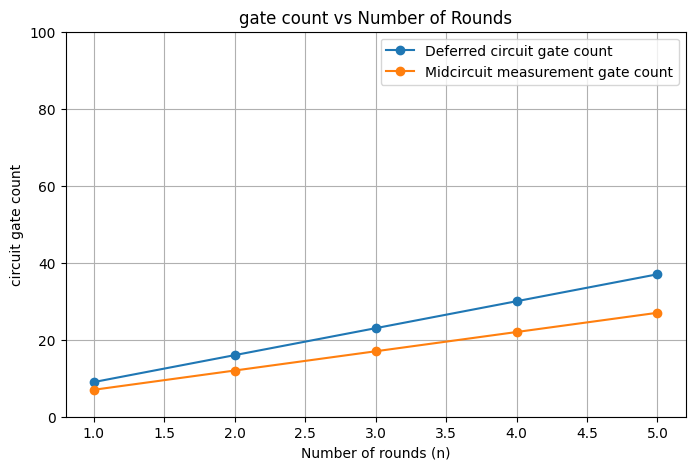

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), gate_counts1, 'o-', label='Deferred circuit gate count')
plt.plot(range(1, n_max + 1), gate_counts2, 'o-', label='Midcircuit measurement gate count')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit gate count')
plt.title('gate count vs Number of Rounds')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
deferred_ones, measured_ones = reuse_efficiency(ionq_circuit_Z, midcircuit_Z, n_max)

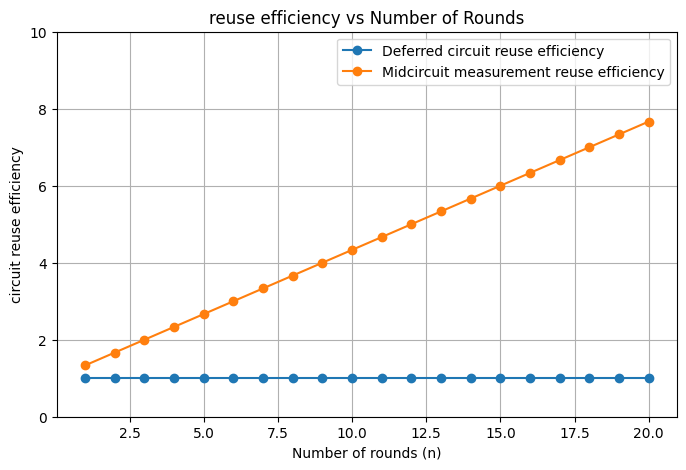

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), deferred_ones, 'o-', label='Deferred circuit reuse efficiency')
plt.plot(range(1, n_max + 1), measured_ones, 'o-', label='Midcircuit measurement reuse efficiency')
plt.xlabel('Number of rounds (n)')
plt.ylabel('circuit reuse efficiency')
plt.title('reuse efficiency vs Number of Rounds')
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()

In [6]:
statevector_MB1, statevector_MB2 = memory_load(ionq_circuit_Z, midcircuit_Z, n_max)

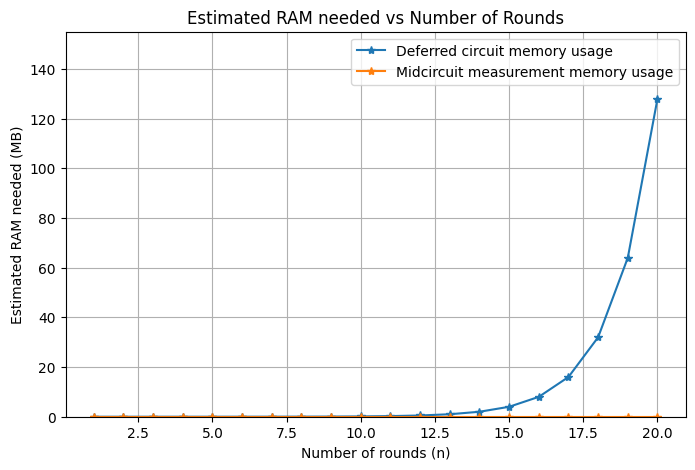

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_max + 1), statevector_MB1, '*-', label='Deferred circuit memory usage')
plt.plot(range(1, n_max + 1), statevector_MB2, '*-', label='Midcircuit measurement memory usage')
plt.xlabel('Number of rounds (n)')
plt.ylabel('Estimated RAM needed (MB)')
plt.title('Estimated RAM needed vs Number of Rounds')
plt.ylim(0, 155)
plt.grid(True)
plt.legend()
plt.show()